In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import Nucleaseq_data_processing as processing
reload(processing)
import create_fake_data as cr
reload(cr)
sys.path.append('../code_general_Finkelsteinlab')
import plotting_Finkelsteinlab as pltData
reload(pltData);
from scipy.optimize import curve_fit

guide = 20

## Load datasets

In [37]:
filenameE = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataE = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdataE, ydataE, yerrE = processing.prepare_multiprocessing_nucleaseq_log(filenameE,path_to_dataE,True)
_, ydatamedianE, yerrmedianE = processing.prepare_multiprocessing_nucleaseq(filenameE, path_to_dataE, True)

In [38]:
filenameD = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataD = '../data_nucleaseq_Finkelsteinlab/targetD/'
xdataD, ydataD, yerrD = processing.prepare_multiprocessing_nucleaseq_log(filenameD,path_to_dataD,True)
_, ydatamedianD, yerrmedianD = processing.prepare_multiprocessing_nucleaseq(filenameD, path_to_dataD, True)

In [39]:
filenameEnhE = 'Enh_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataEnhE = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdataEnhE, ydataEnhE, yerrEnhE = processing.prepare_multiprocessing_nucleaseq_log(filenameEnhE,path_to_dataEnhE,True)
_, ydatamedianEnhE, yerrmedianEnhE = processing.prepare_multiprocessing_nucleaseq(filenameEnhE, path_to_dataEnhE, True)

In [40]:
filenameEnhD = 'Enh_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataEnhD = '../data_nucleaseq_Finkelsteinlab/targetD/'
xdataEnhD, ydataEnhD, yerrEnhD = processing.prepare_multiprocessing_nucleaseq_log(filenameEnhD,path_to_dataEnhD,True)
_, ydatamedianEnhD, yerrmedianEnhD = processing.prepare_multiprocessing_nucleaseq(filenameEnhD, path_to_dataEnhD, True)

In [41]:
filenameHF1E = 'HF1_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataHF1E = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdataHF1E, ydataHF1E, yerrHF1E = processing.prepare_multiprocessing_nucleaseq_log(filenameHF1E,path_to_dataHF1E,True)
_, ydatamedianHF1E, yerrmedianHF1E = processing.prepare_multiprocessing_nucleaseq(filenameHF1E, path_to_dataHF1E, True)

In [42]:
filenameHF1D = 'HF1_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataHF1D = '../data_nucleaseq_Finkelsteinlab/targetD/'
xdataHF1D, ydataHF1D, yerrHF1D = processing.prepare_multiprocessing_nucleaseq_log(filenameHF1D,path_to_dataHF1D,True)
_, ydatamedianHF1D, yerrmedianHF1D = processing.prepare_multiprocessing_nucleaseq(filenameHF1D, path_to_dataHF1D, True)

In [43]:
filenameHypaE = 'Hypa_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataHypaE = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdataHypaE, ydataHypaE, yerrHypaE = processing.prepare_multiprocessing_nucleaseq_log(filenameHypaE,path_to_dataHypaE,True)
_, ydatamedianHypaE, yerrmedianHypaE = processing.prepare_multiprocessing_nucleaseq(filenameHypaE, path_to_dataHypaE, True)

In [44]:
filenameHypaD = 'Hypa_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataHypaD = '../data_nucleaseq_Finkelsteinlab/targetD/'
xdataHypaD, ydataHypaD, yerrHypaD = processing.prepare_multiprocessing_nucleaseq_log(filenameHypaD,path_to_dataHypaD,True)
_, ydatamedianHypaD, yerrmedianHypaD = processing.prepare_multiprocessing_nucleaseq(filenameHypaD, path_to_dataHypaD, True)

## Function to sort information

In [78]:
def extract(xdata,ydata,yerr,ydatamedian,yerrmedian):
    pos = []
    kclv = []
    error = []
    kclvmedian = []
    errormedian = []


    i = 1
    while i < guide+1:
        for a in range(len(xdata)):
            if len(xdata[a])==1 and xdata[a][0]==i:
                pos.append(xdata[a][0])
                kclv.append(np.average(ydata[a], weights=np.array(np.reciprocal(yerr[a]))**2 ))
                kclvmedian.append(ydatamedian[a][0])
                error.append(np.mean(yerr[a]))
                errormedian.append(yerrmedian[a][0])
                i = i + 1

    pos.append(21)
    kclv.append(np.average(ydata[0], weights=np.array(np.reciprocal(yerr[0]))**2))
    error.append(np.mean(yerr[0]))
    kclvmedian.append(ydata[0][0])
    errormedian.append(yerr[0][0])

    pos = np.array(pos)
    kclv = np.array(kclv)
    error = np.array(error)
    kclvmedian = np.array(kclvmedian)
    errormedian = np.array(errormedian)
    
    k_double = np.zeros([20,20])
    k_doublemedian = np.zeros([20,20])
    k_error = np.zeros([20,20])
    k_errormedian = np.zeros([20,20])
    
    for a in range(len(xdata)):
        if len(xdata[a])==2:
            i = xdata[a][0]
            j = xdata[a][1]
            k_double[j-1,i-1] = (np.average(ydata[a], weights=np.array(np.reciprocal(yerr[a]))**2))
            if k_double[j-1,i-1] < -4.78:
                k_double[j-1,i-1] = np.nan
            k_doublemedian[j-1,i-1] = np.log10(np.median(ydata[a]))
            k_error[j-1,i-1] = np.average(np.array(ydata[a])/np.array(yerr[a]))
            k_errormedian[j-1,i-1] = ydatamedian[a][0]/yerrmedian[a][0]

    k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
    k_doublemedian_df = pd.DataFrame(k_doublemedian, index=range(1, 21), columns=range(1, 21))
    k_error_df = pd.DataFrame(k_error, index=range(1,21), columns=range(1,21))
    k_errormedian_df = pd.DataFrame(k_errormedian, index=range(1,21), columns=range(1,21))
    
    return pos, kclv, error, kclvmedian, errormedian, k_double_df, k_doublemedian_df, k_error_df, k_errormedian_df

In [79]:
posE,kclvE,errorE,kclvmedianE,errormedianE,k_double_dfE,k_doublemedian_dfE,k_error_dfE,k_errormedian_dfE=extract(xdataE,ydataE,yerrE,ydatamedianE,yerrmedianE)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [80]:
posD,kclvD,errorD,kclvmedianD,errormedianD,k_double_dfD,k_doublemedian_dfD,k_error_dfD,k_errormedian_dfD=extract(xdataD,ydataD,yerrD,ydatamedianD,yerrmedianD)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [81]:
posEnhE,kclvEnhE,errorEnhE,kclvmedianEnhE,errormedianEnhE,k_double_dfEnhE,k_doublemedian_dfEnhE,k_error_dfEnhE,k_errormedian_dfEnhE=extract(xdataEnhE,ydataEnhE,yerrEnhE,ydatamedianEnhE,yerrmedianEnhE)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [82]:
posEnhD,kclvEnhD,errorEnhD,kclvmedianEnhD,errormedianEnhD,k_double_dfEnhD,k_doublemedian_dfEnhD,k_error_dfEnhD,k_errormedian_dfEnhD=extract(xdataEnhD,ydataEnhD,yerrEnhD,ydatamedianEnhD,yerrmedianEnhD)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [83]:
posHF1E,kclvHF1E,errorHF1E,kclvmedianHF1E,errormedianHF1E,k_double_dfHF1E,k_doublemedian_dfHF1E,k_error_dfHF1E,k_errormedian_dfHF1E=extract(xdataHF1E,ydataHF1E,yerrHF1E,ydatamedianHF1E,yerrmedianHF1E)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [84]:
posHF1D,kclvHF1D,errorHF1D,kclvmedianHF1D,errormedianHF1D,k_double_dfHF1D,k_doublemedian_dfHF1D,k_error_dfHF1D,k_errormedian_dfHF1D=extract(xdataHF1D,ydataHF1D,yerrHF1D,ydatamedianHF1D,yerrmedianHF1D)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [85]:
posHypaE,kclvHypaE,errorHypaE,kclvmedianHypaE,errormedianHypaE,k_double_dfHypaE,k_doublemedian_dfHypaE,k_error_dfHypaE,k_errormedian_dfHypaE=extract(xdataHypaE,ydataHypaE,yerrHypaE,ydatamedianHypaE,yerrmedianHypaE)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


In [86]:
posHypaD,kclvHypaD,errorHypaD,kclvmedianHypaD,errormedianHypaD,k_double_dfHypaD,k_doublemedian_dfHypaD,k_error_dfHypaD,k_errormedian_dfHypaD=extract(xdataHypaD,ydataHypaD,yerrHypaD,ydatamedianHypaD,yerrmedianHypaD)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


## Single mismatch, weighted average

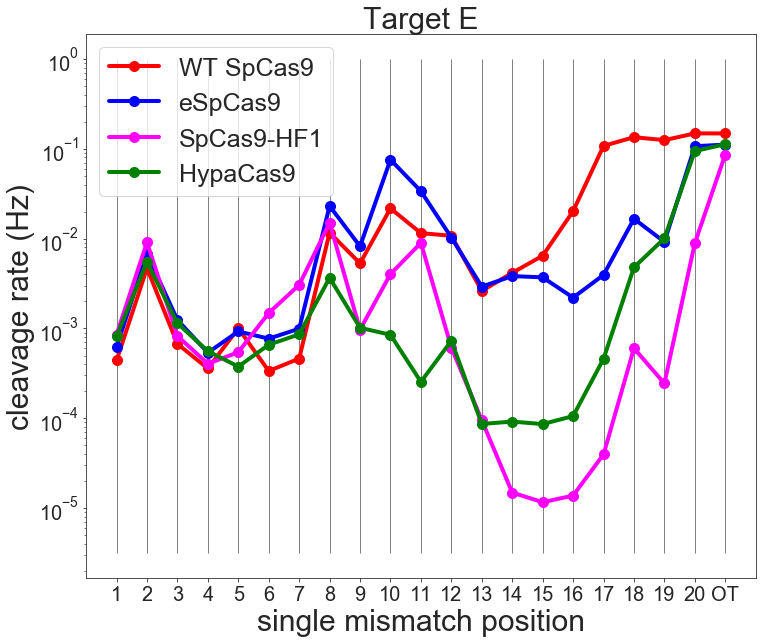

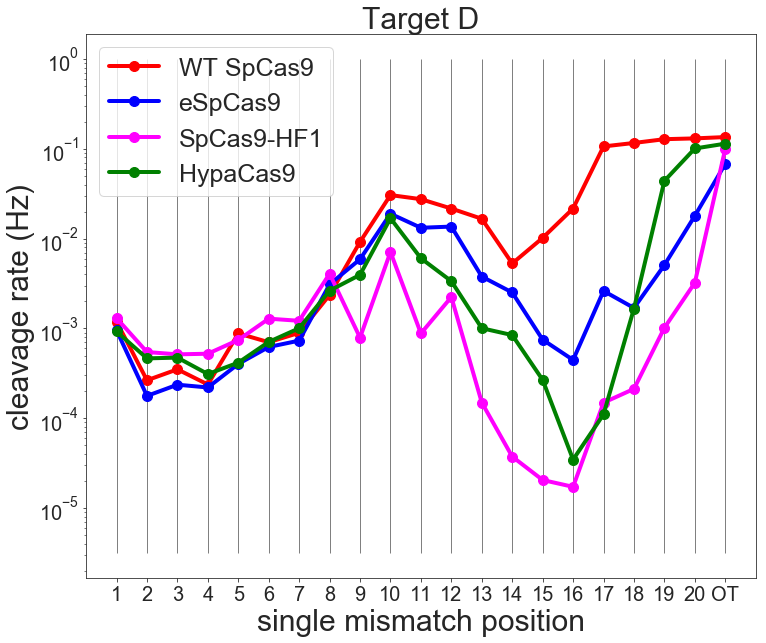

In [55]:
plt.figure(figsize=[12,10])
plt.semilogy(range(1,22),10**kclvE, marker='o', linewidth=4, color='red', markersize=10)
#plt.semilogy(range(1,22),kclvD, marker='o', linewidth=4, color='blue', markersize=10)
plt.semilogy(range(1,22),10**kclvEnhE, marker='o', linewidth=4, color='blue', markersize=10)
#plt.semilogy(range(1,22),kclvEnhD, marker='o', linewidth=4, color='green', markersize=10)
plt.semilogy(range(1,22),10**kclvHF1E, marker='o', linewidth=4, color='magenta', markersize=10)
#plt.semilogy(range(1,22),kclvHF1D, marker='o', linewidth=4, color='cyan', markersize=10)
plt.semilogy(range(1,22),10**kclvHypaE, marker='o', linewidth=4, color='green', markersize=10)
#plt.semilogy(range(1,22),kclvHypaD, marker='o', linewidth=4, color='purple', markersize=10)


plt.xlabel('single mismatch position', fontsize=30)
plt.ylabel('cleavage rate (Hz)', fontsize=30)
plt.title('Target E', fontsize=30)
plt.vlines(range(1,22),10**-5.5,1**-0.5,linewidth=1.,color='grey')

plt.legend(['WT SpCas9',  'eSpCas9',  'SpCas9-HF1',  'HypaCas9'],loc='upper left',fontsize=25)
plt.xticks(range(1,22),range(1,21)+['OT'],fontsize=20)
plt.yticks(fontsize=20)

plt.figure(figsize=[12,10])
plt.semilogy(range(1,22),10**kclvD, marker='o', linewidth=4, color='red', markersize=10)
#plt.semilogy(range(1,22),kclvD, marker='o', linewidth=4, color='blue', markersize=10)
plt.semilogy(range(1,22),10**kclvEnhD, marker='o', linewidth=4, color='blue', markersize=10)
#plt.semilogy(range(1,22),kclvEnhD, marker='o', linewidth=4, color='green', markersize=10)
plt.semilogy(range(1,22),10**kclvHF1D, marker='o', linewidth=4, color='magenta', markersize=10)
#plt.semilogy(range(1,22),kclvHF1D, marker='o', linewidth=4, color='cyan', markersize=10)
plt.semilogy(range(1,22),10**kclvHypaD, marker='o', linewidth=4, color='green', markersize=10)
#plt.semilogy(range(1,22),kclvHypaD, marker='o', linewidth=4, color='purple', markersize=10)


plt.xlabel('single mismatch position', fontsize=30)
plt.ylabel('cleavage rate (Hz)', fontsize=30)
plt.title('Target D', fontsize=30)
plt.vlines(range(1,22),10**-5.5,1**-0.5,linewidth=1.,color='grey')
plt.xticks(range(1,22),range(1,21)+['OT'],fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['WT SpCas9',  'eSpCas9',  'SpCas9-HF1',  'HypaCas9'],loc='upper left',fontsize=25)

## Single mismatch, median

(array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
        1.e+01]), <a list of 9 Text yticklabel objects>)

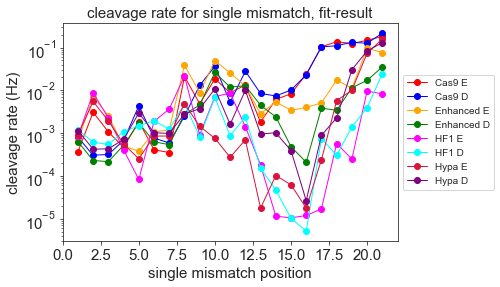

In [20]:
plt.figure
plt.semilogy(range(1,22),kclvmedianE, marker='o', linewidth=1, color='red')
plt.semilogy(range(1,22),kclvmedianD, marker='o', linewidth=1, color='blue')
plt.semilogy(range(1,22),kclvmedianEnhE, marker='o', linewidth=1, color='orange')
plt.semilogy(range(1,22),kclvmedianEnhD, marker='o', linewidth=1, color='green')
plt.semilogy(range(1,22),kclvmedianHF1E, marker='o', linewidth=1, color='magenta')
plt.semilogy(range(1,22),kclvmedianHF1D, marker='o', linewidth=1, color='cyan')
plt.semilogy(range(1,22),kclvmedianHypaE, marker='o', linewidth=1, color='crimson')
plt.semilogy(range(1,22),kclvmedianHypaD, marker='o', linewidth=1, color='purple')

#plt.errorbar(posE,kclvmedianE,errormedianE, marker='o', linewidth=1, color='red')
#plt.errorbar(posD,kclvmedianD,errormedianD, marker='o', linewidth=1, color='blue')
#plt.errorbar(posEnhE,kclvmedianEnhE,errormedianEnhE, marker='o', linewidth=1, color='orange')
#plt.errorbar(posEnhD,kclvmedianEnhD,errormedianEnhD, marker='o', linewidth=1, color='green')
#plt.errorbar(posHF1E,kclvmedianHF1E,errormedianHF1E, marker='o', linewidth=1, color='magenta')
#plt.errorbar(posHF1D,kclvmedianHF1D,errormedianHF1D, marker='o', linewidth=1, color='cyan')
#plt.errorbar(posHypaE,kclvmedianHypaE,errormedianHypaE, marker='o', linewidth=1, color='crimson')
#plt.errorbar(posHypaD,kclvmedianHypaD,errormedianHypaD, marker='o', linewidth=1, color='purple')

plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('cleavage rate (Hz)', fontsize=15)
plt.title('cleavage rate for single mismatch, fit-result', fontsize=15)


plt.legend(['Cas9 E', 'Cas9 D', 'Enhanced E', 'Enhanced D', 'HF1 E', 'HF1 D', 'Hypa E', 'Hypa D'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Double mismatch, Cas9, weighted average

Text(0.5,0.98,'Double mismatches for Cas9 variants')

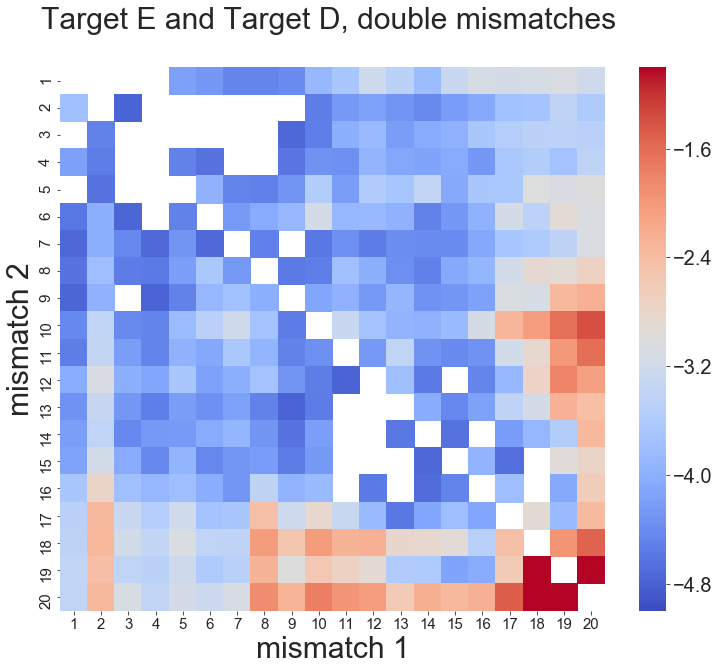

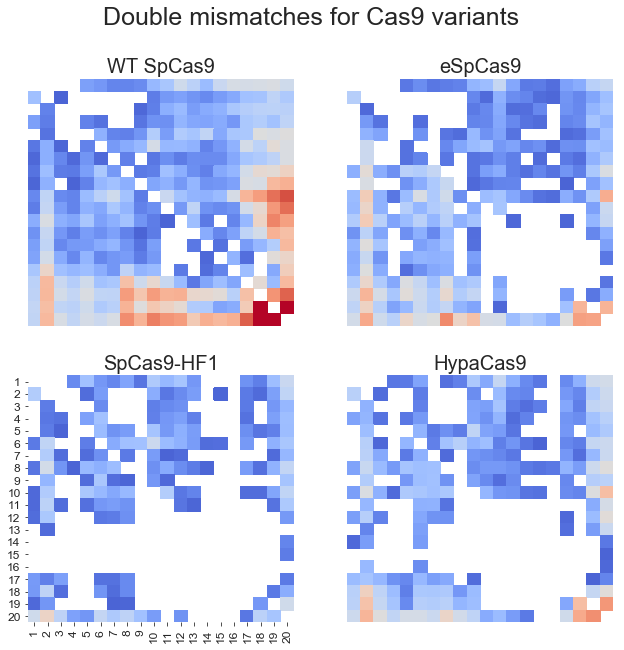

In [87]:
combined_df_wa = k_double_dfE + k_double_dfD.transpose()
combined_df_median = k_doublemedian_dfE + k_doublemedian_dfD.transpose()
combined_error = k_error_dfE + k_error_dfD.transpose()
combined_error_median = k_errormedian_dfE + k_errormedian_dfD.transpose()

for i in range(1,21):
    combined_df_wa[i].loc[i]=np.nan
    combined_df_median[i].loc[i]=np.nan
    combined_error[i].loc[i]=np.nan
    combined_error_median[i].loc[i]=np.nan
    
    
combined_df_waEnh = k_double_dfEnhE + k_double_dfEnhD.transpose()
combined_df_medianEnh = k_doublemedian_dfEnhE + k_doublemedian_dfEnhD.transpose()
combined_errorEnh = k_error_dfEnhE + k_error_dfEnhD.transpose()
combined_error_medianEnh = k_errormedian_dfEnhE + k_errormedian_dfEnhD

for i in range(1,21):
    combined_df_waEnh[i].loc[i]=np.nan
    combined_df_medianEnh[i].loc[i]=np.nan
    combined_errorEnh[i].loc[i]=np.nan
    combined_error_medianEnh[i].loc[i]=np.nan
    
combined_df_waHF1 = k_double_dfHF1E + k_double_dfHF1D.transpose()
combined_df_medianHF1 = k_doublemedian_dfHF1E + k_doublemedian_dfHF1D.transpose()
combined_errorHF1 = k_error_dfHF1E + k_error_dfHF1D.transpose()
combined_error_medianHF1 = k_errormedian_dfHF1E + k_errormedian_dfHF1D

for i in range(1,21):
    combined_df_waHF1[i].loc[i]=np.nan
    combined_df_medianHF1[i].loc[i]=np.nan
    combined_errorHF1[i].loc[i]=np.nan
    combined_error_medianHF1[i].loc[i]=np.nan
    
combined_df_waHypa = k_double_dfHypaE + k_double_dfHypaD.transpose()
combined_df_medianHypa = k_doublemedian_dfHypaE + k_doublemedian_dfHypaD.transpose()
combined_errorHypa = k_error_dfHypaE + k_error_dfHypaD.transpose()
combined_error_medianHypa = k_errormedian_dfHypaE + k_errormedian_dfHypaD

for i in range(1,21):
    combined_df_waHypa[i].loc[i]=np.nan
    combined_df_medianHypa[i].loc[i]=np.nan
    combined_errorHypa[i].loc[i]=np.nan
    combined_error_medianHypa[i].loc[i]=np.nan
    
compare = k_double_dfE + k_double_dfD.transpose()

for i in range(1,21):
    compare[i].loc[i]=np.nan

plt.figure(figsize=[12.2,10])
g0 = sns.heatmap(compare,cmap="coolwarm",cbar=True,vmin=-5,vmax=-1)
g0.set_title('Target E and Target D, double mismatches \n',fontsize=30)
plt.xlabel('mismatch 1', fontsize=30)
plt.ylabel('mismatch 2', fontsize=30)
plt.xticks(np.arange(0.5,20.5),range(1,21),fontsize=15)
plt.yticks(np.arange(0.5,20.5),range(1,21),fontsize=15)
cbar = g0.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

f,ax = plt.subplots(2,2,sharey=False,figsize=[10.5,10])
g1 = sns.heatmap(combined_df_wa,cmap="coolwarm",cbar=False,ax=ax[0][0], vmin=-5, vmax=-1)
g1.set_title('WT SpCas9', fontsize=20)
g1.set_xticks([],[])
g1.set_yticks([],[])

g3 = sns.heatmap(combined_df_waEnh,cmap="coolwarm",cbar=False,ax=ax[0][1], vmin=-5, vmax=-1)
g3.set_title('eSpCas9', fontsize=20)
g3.set_xticks([],[])
g3.set_yticks([],[])

g5 = sns.heatmap(combined_df_waHF1,cmap="coolwarm",cbar=False,ax=ax[1][0], vmin=-5, vmax=-1)
g5.set_title('SpCas9-HF1', fontsize=20)
g5.set_xticks(np.arange(0.5,20.5))
g5.set_yticks(np.arange(0.5,20.5))
g5.set_xticklabels(range(1,21),fontsize =12, rotation = 'vertical')
g5.set_yticklabels(range(1,21),fontsize =12, rotation = 'horizontal')

g7 = sns.heatmap(combined_df_waHypa,cmap="coolwarm",cbar=False,ax=ax[1][1], vmin=-5, vmax=-1)
g7.set_title('HypaCas9', fontsize=20)
g7.set_xticks([],[])
g7.set_yticks([],[])

f.suptitle('Double mismatches for Cas9 variants', fontsize=25)
#sns.heatmap(combined_df_wa, cmap='coolwarm', cbar=True, vmin=-8, vmax =-1)
#plt.xlabel('mismatch 1', fontsize=15)
#plt.ylabel('mismatch 2', fontsize=15)
#plt.title('double mismatches, top=D bottom=E', fontsize=15)

Text(0,0.5,'Target D cleavage rate (Hz)')

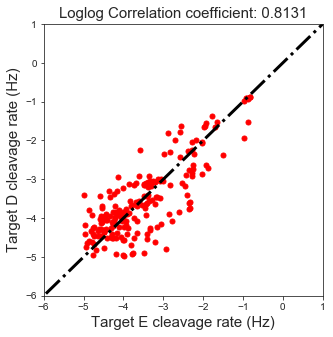

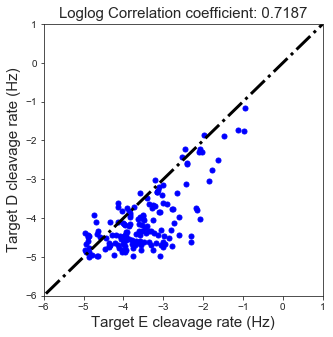

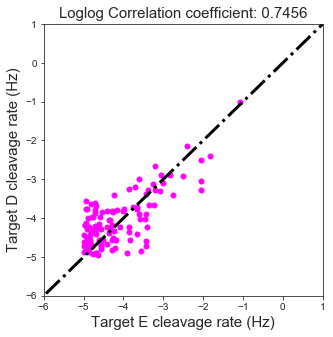

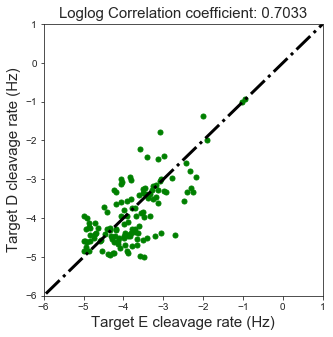

In [88]:
limit = -5

x,yE,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameE,path_to_dataE,True)
_,yD,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameD,path_to_dataD,True)

E = []
D = []

for i in range(len(x)):
    if yE[i][0]>limit and yD[i][0]>limit:
        E.append(yE[i][0])
        D.append(yD[i][0])

plt.figure(figsize=[5,5])
plt.plot(E,D,marker='o',markersize=5,color='red',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([limit-1,1,limit-1,1])
plt.title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([E,D])[0][1],4)), fontsize=15)
plt.xlabel('Target E cleavage rate (Hz)',fontsize=15)
plt.ylabel('Target D cleavage rate (Hz)',fontsize=15)

x,yEnhE,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameEnhE,path_to_dataEnhE,True)
_,yEnhD,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameEnhD,path_to_dataEnhD,True)

EnhE = []
EnhD = []

for i in range(len(x)):
    if yEnhE[i][0]>limit and yEnhD[i][0]>limit:
        EnhE.append(yEnhE[i][0])
        EnhD.append(yEnhD[i][0])

plt.figure(figsize=[5,5])
plt.plot(EnhE,EnhD,marker='o',markersize=5,color='blue',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([limit-1,1,limit-1,1])
plt.title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([EnhE,EnhD])[0][1],4)), fontsize=15)
plt.xlabel('Target E cleavage rate (Hz)',fontsize=15)
plt.ylabel('Target D cleavage rate (Hz)',fontsize=15)

x,yHF1E,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameHF1E,path_to_dataHF1E,True)
_,yHF1D,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameHF1D,path_to_dataHF1D,True)

HF1E = []
HF1D = []

for i in range(len(x)):
    if yHF1E[i][0]>limit and yHF1D[i][0]>limit:
        HF1E.append(yHF1E[i][0])
        HF1D.append(yHF1D[i][0])

plt.figure(figsize=[5,5])
plt.plot(HF1E,HF1D,marker='o',markersize=5,color='magenta',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([limit-1,1,limit-1,1])
plt.title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([HF1E,HF1D])[0][1],4)), fontsize=15)
plt.xlabel('Target E cleavage rate (Hz)',fontsize=15)
plt.ylabel('Target D cleavage rate (Hz)',fontsize=15)

x,yHypaE,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameHypaE,path_to_dataHypaE,True)
_,yHypaD,_ = processing.prepare_multiprocessing_nucleaseq_log(filenameHypaD,path_to_dataHypaD,True)

HypaE = []
HypaD = []

for i in range(len(x)):
    if yHypaE[i][0]>limit and yHypaD[i][0]>limit:
        HypaE.append(yHypaE[i][0])
        HypaD.append(yHypaD[i][0])

plt.figure(figsize=[5,5])
plt.plot(HypaE,HypaD,marker='o',markersize=5,color='green',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([limit-1,1,limit-1,1])
plt.title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([HypaE,HypaD])[0][1],4)), fontsize=15)
plt.xlabel('Target E cleavage rate (Hz)',fontsize=15)
plt.ylabel('Target D cleavage rate (Hz)',fontsize=15)

## Double mismatch, EnhCas9, weighted average

In [ ]:
combined_df_waEnh = k_double_dfEnhE + k_double_dfEnhD.transpose()
combined_df_medianEnh = k_doublemedian_dfEnhE + k_doublemedian_dfEnhD.transpose()
combined_errorEnh = k_error_dfEnhE + k_error_dfEnhD.transpose()
combined_error_medianEnh = k_errormedian_dfE + k_errormedian_dfD

for i in range(1,21):
    combined_df_waEnh[i].loc[i]=np.nan
    combined_df_medianEnh[i].loc[i]=np.nan
    combined_errorEnh[i].loc[i]=np.nan
    combined_error_medianEnh[i].loc[i]=np.nan

sns.heatmap(combined_df_waEnh, cmap='coolwarm', cbar=True, vmin=-8, vmax =-1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('double mismatches, top=D bottom=E', fontsize=15)

## Double mismatch, Cas9, median

In [ ]:
sns.heatmap(combined_df_median, cmap='coolwarm', cbar=True, vmin = -8, vmax = -1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('double mismatches, top=D bottom=E', fontsize=15)

## Double mismatch, EnhCas9, median

In [ ]:
plt.subplot(1,1,1)
plot = sns.heatmap(combined_df_medianEnh, cmap='coolwarm', cbar=True, vmin = -8, vmax = -1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('double mismatches, top=D bottom=E', fontsize=15)



## Errors

In [ ]:
sns.heatmap(combined_error, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('data/error double mismatches, top=D bottom=E', fontsize=15)

In [ ]:
sns.heatmap(combined_error_median, cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('data/error double mismatches, top=D bottom=E', fontsize=15)